LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, MobileNetV2, VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMPORT DATA

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data and convert labels to one-hot encoding
x_train = x_train.astype(np.float32) / 255.0
y_train = to_categorical(y_train, 10)


x_test = x_test.astype(np.float32) / 255.0
y_test = to_categorical(y_test, 10)

# Split the data into training (80%) and validation (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


DATA AUGMENTATION

In [3]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.2)

datagen.fit(x_train)

MODEL 1

In [4]:
#base simple
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [5]:
optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
313/313 [==============================] - 6s 7ms/step - loss: 1.6139 - accuracy: 0.4186 - val_loss: 1.3656 - val_accuracy: 0.5115
Epoch 2/50
313/313 [==============================] - 2s 5ms/step - loss: 1.2756 - accuracy: 0.5513 - val_loss: 1.1997 - val_accuracy: 0.5819
Epoch 3/50
313/313 [==============================] - 2s 5ms/step - loss: 1.1344 - accuracy: 0.6031 - val_loss: 1.1099 - val_accuracy: 0.6084
Epoch 4/50
313/313 [==============================] - 2s 5ms/step - loss: 1.0379 - accuracy: 0.6384 - val_loss: 1.0409 - val_accuracy: 0.6430
Epoch 5/50
313/313 [==============================] - 2s 5ms/step - loss: 0.9655 - accuracy: 0.6654 - val_loss: 1.0098 - val_accuracy: 0.6509
Epoch 6/50
313/313 [==============================] - 2s 5ms/step - loss: 0.9007 - accuracy: 0.6880 - val_loss: 0.9802 - val_accuracy: 0.6560
Epoch 7/50
313/313 [==============================] - 2s 5ms/step - loss: 0.8488 - accuracy: 0.7065 - val_loss: 0.9366 - val_accuracy: 0.6749
Epoch 

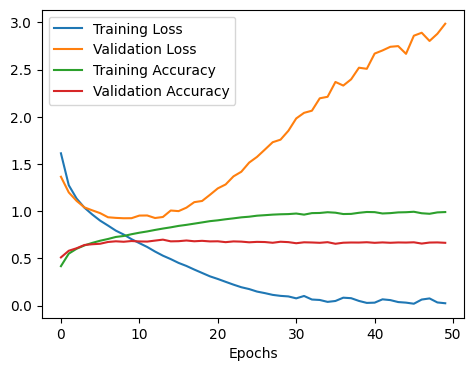

313/313 [==============================] - 1s 3ms/step - loss: 2.9866 - accuracy: 0.6659


[2.9865524768829346, 0.6658999919891357]

In [6]:
history1 = model1.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

model1.evaluate(x_train, y_train)
model1.evaluate(x_val, y_val)

MODEL 2

In [7]:
# Create a more complex Sequential model named "model3" with dropout layers
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))  # Add dropout after the max-pooling layer

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 128)       147584    
                                                      

Epoch 1/50
313/313 [==============================] - 7s 12ms/step - loss: 1.9579 - accuracy: 0.2608 - val_loss: 1.4959 - val_accuracy: 0.4467
Epoch 2/50
313/313 [==============================] - 3s 10ms/step - loss: 1.4473 - accuracy: 0.4680 - val_loss: 1.2464 - val_accuracy: 0.5414
Epoch 3/50
313/313 [==============================] - 3s 10ms/step - loss: 1.2270 - accuracy: 0.5589 - val_loss: 1.0205 - val_accuracy: 0.6332
Epoch 4/50
313/313 [==============================] - 3s 10ms/step - loss: 1.0910 - accuracy: 0.6126 - val_loss: 0.9395 - val_accuracy: 0.6597
Epoch 5/50
313/313 [==============================] - 3s 10ms/step - loss: 0.9840 - accuracy: 0.6562 - val_loss: 0.8657 - val_accuracy: 0.6964
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 0.9128 - accuracy: 0.6814 - val_loss: 0.8532 - val_accuracy: 0.7013
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 0.8461 - accuracy: 0.7069 - val_loss: 0.8243 - val_accuracy: 0.7130

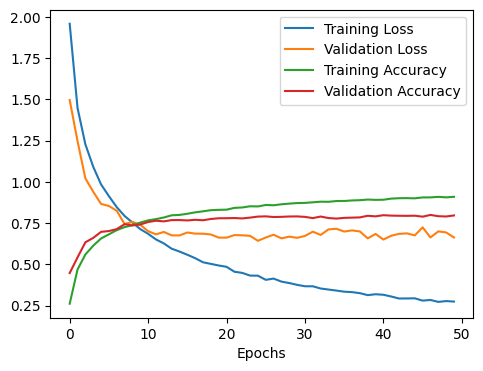

In [8]:
history2 = model2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [9]:
model2.evaluate(x_val, y_val)
model2.evaluate(x_train, y_train)

1250/1250 [==============================] - 4s 3ms/step - loss: 0.0612 - accuracy: 0.9912


[0.061229247599840164, 0.9912499785423279]

SEARCH LEARNING RATE WITH MODEL 2

In [11]:
# Learning rates to search
learning_rates = [0.0001, 0.001, 0.01, 0.1]

# Results
best_accuracy = 0.0
best_model = None
best_learning_rate = None
accuracy_list_model2 = []
for lr in learning_rates:
    # Create a new instance of "model3" for each learning rate
    model2 = Sequential()

    model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model2.add(Conv2D(64, (3, 3), activation='relu'))
    model2.add(MaxPooling2D((2, 2)))
    model2.add(Dropout(0.25))  # Add dropout after the max-pooling layer

    model2.add(Conv2D(128, (3, 3), activation='relu'))
    model2.add(Conv2D(128, (3, 3), activation='relu'))
    model2.add(MaxPooling2D((2, 2)))
    model2.add(Dropout(0.25))

    model2.add(Flatten())
    model2.add(Dense(512, activation='relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(256, activation='relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(128, activation='relu'))
    model2.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=lr)
    model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model2.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_val, y_val))

    # Evaluate the model on the validation set
    _, accuracy = model2.evaluate(x_val, y_val)
    accuracy_list_model2 .append(accuracy)
    # Check if this model has the highest accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model2
        best_learning_rate = lr

# Print the best learning rate and accuracy
print(f'Best learning rate: {best_learning_rate}')
print(f'Best validation accuracy: {best_accuracy}')
print(accuracy_list_model2)

Epoch 1/50
625/625 [==============================] - 7s 7ms/step - loss: 1.9943 - accuracy: 0.2363 - val_loss: 1.6809 - val_accuracy: 0.3820
Epoch 2/50
625/625 [==============================] - 4s 7ms/step - loss: 1.6414 - accuracy: 0.3878 - val_loss: 1.4328 - val_accuracy: 0.4699
Epoch 3/50
625/625 [==============================] - 4s 7ms/step - loss: 1.4742 - accuracy: 0.4568 - val_loss: 1.3185 - val_accuracy: 0.5166
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 1.3602 - accuracy: 0.5060 - val_loss: 1.2161 - val_accuracy: 0.5589
Epoch 5/50
625/625 [==============================] - 4s 7ms/step - loss: 1.2767 - accuracy: 0.5367 - val_loss: 1.1875 - val_accuracy: 0.5699
Epoch 6/50
625/625 [==============================] - 4s 7ms/step - loss: 1.2085 - accuracy: 0.5629 - val_loss: 1.0869 - val_accuracy: 0.6093
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 1.1374 - accuracy: 0.5919 - val_loss: 1.0534 - val_accuracy: 0.6231
Epoch 

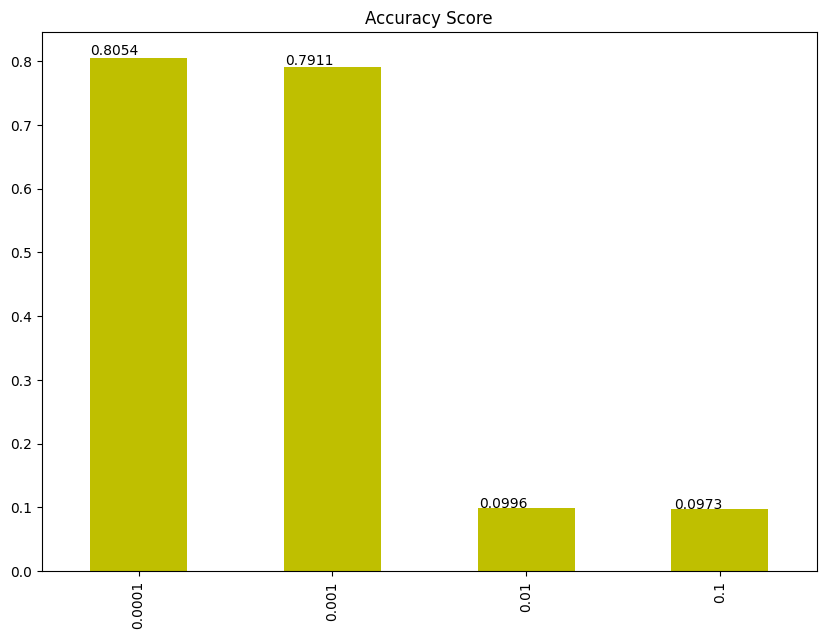

In [12]:

metric_val = {
    "accuracy score": {
    "0.0001": accuracy_list_model2[0],
    "0.001": accuracy_list_model2[1],
    "0.01": accuracy_list_model2[2],
    "0.1": accuracy_list_model2[3]
    }
}

ax = pd.DataFrame(metric_val).plot(kind="bar",
                             figsize = (10,7),
                             legend =False,
                             title = "Accuracy Score",
                             color = "y");

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 4)), (p.get_x() * 1.005, p.get_height() * 1.005))

RESNET50

94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/50
313/313 [==============================] - 44s 49ms/step - loss: 1.3660 - accuracy: 0.5395 - val_loss: 11.5307 - val_accuracy: 0.0804
Epoch 2/50
313/313 [==============================] - 14s 45ms/step - loss: 0.6813 - accuracy: 0.7631 - val_loss: 3.9503 - val_accuracy: 0.1454
Epoch 3/50
313/313 [==============================] - 14s 45ms/step - loss: 0.3965 - accuracy: 0.8648 - val_loss: 1.3141 - val_accuracy: 0.5921
Epoch 4/50
313/313 [==============================] - 14s 44ms/step - loss: 0.2378 - accuracy: 0.9195 - val_loss: 0.8988 - val_accuracy: 0.7340
Epoch 5/50
313/313 [==============================] - 14s 44ms/step - loss: 0.1592 - accuracy: 0.9464 - val_loss: 0.9965 - val_accuracy: 0.7382
Epoch 6/50
313/313 [==============================] - 14s 44ms/step - loss: 0.1264 - accuracy: 0.9573 - val_loss: 1.0053 - val_accuracy: 0.7557
Epoch 7/50
313/313 [==============================] - 13s 42ms/step - 

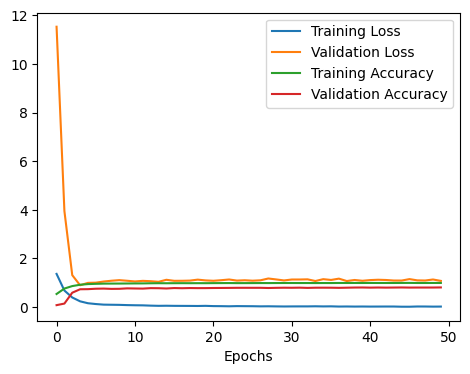

313/313 [==============================] - 3s 9ms/step - loss: 1.0780 - accuracy: 0.8092


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model with learning rate 0.0001 saved.
Validation accuracy: 0.8091999888420105


In [13]:
# Define the learning rate
learning_rate = 0.0001

# Load a pre-trained ResNet50 model (excluding the top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a custom top classification layer for CIFAR-10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_res50_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_res50_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
his_50_1 = model_res50_1.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(his_50_1.history['loss'], label='Training Loss')
plt.plot(his_50_1.history['val_loss'], label='Validation Loss')
plt.plot(his_50_1.history['accuracy'], label='Training Accuracy')
plt.plot(his_50_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
# Evaluate the model on the validation set
_, accuracy = model_res50_1.evaluate(x_val, y_val)

# Save the model
model_res50_1.save(f'resnet50_lr{learning_rate}.h5')
print(f'Model with learning rate {learning_rate} saved.')
print(f'Validation accuracy: {accuracy}')

Epoch 1/50
313/313 [==============================] - 46s 52ms/step - loss: 1.1610 - accuracy: 0.6281 - val_loss: 5.9082 - val_accuracy: 0.0973
Epoch 2/50
313/313 [==============================] - 15s 48ms/step - loss: 0.6850 - accuracy: 0.7691 - val_loss: 3.0309 - val_accuracy: 0.2367
Epoch 3/50
313/313 [==============================] - 15s 49ms/step - loss: 0.5480 - accuracy: 0.8151 - val_loss: 1.2316 - val_accuracy: 0.6282
Epoch 4/50
313/313 [==============================] - 15s 48ms/step - loss: 0.4520 - accuracy: 0.8463 - val_loss: 0.8032 - val_accuracy: 0.7423
Epoch 5/50
313/313 [==============================] - 15s 48ms/step - loss: 0.3801 - accuracy: 0.8734 - val_loss: 1.0040 - val_accuracy: 0.7256
Epoch 6/50
313/313 [==============================] - 15s 48ms/step - loss: 0.3267 - accuracy: 0.8902 - val_loss: 0.7758 - val_accuracy: 0.7772
Epoch 7/50
313/313 [==============================] - 15s 48ms/step - loss: 0.2686 - accuracy: 0.9090 - val_loss: 0.9837 - val_accuracy:

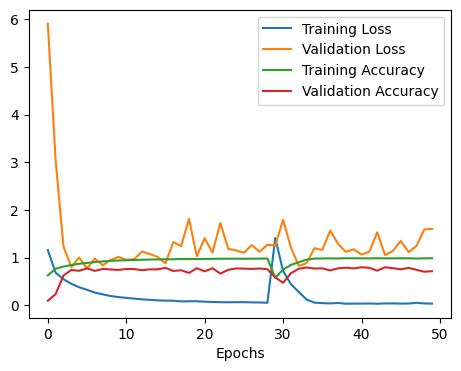

313/313 [==============================] - 3s 10ms/step - loss: 1.6045 - accuracy: 0.7177
Model with learning rate 0.001 saved.
Validation accuracy: 0.7177000045776367


In [15]:
# Define the learning rate
learning_rate = 0.001

# Load a pre-trained ResNet50 model (excluding the top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a custom top classification layer for CIFAR-10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_res50_2 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_res50_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
his_50_2 = model_res50_2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(his_50_2.history['loss'], label='Training Loss')
plt.plot(his_50_2.history['val_loss'], label='Validation Loss')
plt.plot(his_50_2.history['accuracy'], label='Training Accuracy')
plt.plot(his_50_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
# Evaluate the model on the validation set
_, accuracy = model_res50_2.evaluate(x_val, y_val)

# Save the model
model_res50_2.save(f'cifar10_resnet50_lr{learning_rate}.h5')
print(f'Model with learning rate {learning_rate} saved.')
print(f'Validation accuracy: {accuracy}')

VGG16

58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/50
313/313 [==============================] - 13s 28ms/step - loss: 0.9040 - accuracy: 0.6808 - val_loss: 0.6688 - val_accuracy: 0.7685
Epoch 2/50
313/313 [==============================] - 7s 24ms/step - loss: 0.5455 - accuracy: 0.8113 - val_loss: 0.5245 - val_accuracy: 0.8232
Epoch 3/50
313/313 [==============================] - 7s 24ms/step - loss: 0.3871 - accuracy: 0.8652 - val_loss: 0.4877 - val_accuracy: 0.8342
Epoch 4/50
313/313 [==============================] - 7s 24ms/step - loss: 0.2873 - accuracy: 0.8997 - val_loss: 0.4695 - val_accuracy: 0.8463
Epoch 5/50
313/313 [==============================] - 7s 24ms/step - loss: 0.1950 - accuracy: 0.9323 - val_loss: 0.4950 - val_accuracy: 0.8493
Epoch 6/50
313/313 [==============================] - 7s 24ms/step - loss: 0.1311 - accuracy: 0.9539 - val_loss: 0.5948 - val_accuracy: 0.8354
Epoch 7/50
313/313 [==============================] - 7s 24ms/step - loss: 0

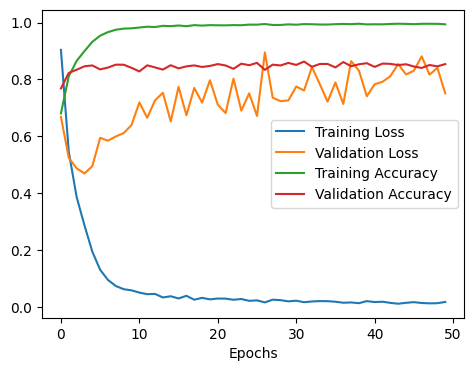

Model with learning rate 0.0001 saved.
Validation accuracy: 0.8539999723434448


In [16]:
# Define the learning rate
learning_rate = 0.0001

# Load a pre-trained VGG16 model (excluding the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a custom top classification layer for CIFAR-10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_vgg_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_vgg_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
his_vgg_1 = model_vgg_1.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

# Evaluate the model on the validation set
_, accuracy = model_vgg_1.evaluate(x_val, y_val)
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(his_vgg_1.history['loss'], label='Training Loss')
plt.plot(his_vgg_1.history['val_loss'], label='Validation Loss')
plt.plot(his_vgg_1.history['accuracy'], label='Training Accuracy')
plt.plot(his_vgg_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
# Save the model
model_vgg_1.save(f'cifar10_vgg16_lr{learning_rate}.h5')
print(f'Model with learning rate {learning_rate} saved.')
print(f'Validation accuracy: {accuracy}')

Epoch 1/50
313/313 [==============================] - 12s 25ms/step - loss: 1.9457 - accuracy: 0.2198 - val_loss: 1.6997 - val_accuracy: 0.3088
Epoch 2/50
313/313 [==============================] - 7s 24ms/step - loss: 1.4323 - accuracy: 0.4441 - val_loss: 1.2869 - val_accuracy: 0.5082
Epoch 3/50
313/313 [==============================] - 7s 24ms/step - loss: 1.1605 - accuracy: 0.5634 - val_loss: 1.1095 - val_accuracy: 0.5655
Epoch 4/50
313/313 [==============================] - 7s 24ms/step - loss: 0.9294 - accuracy: 0.6766 - val_loss: 0.8466 - val_accuracy: 0.7111
Epoch 5/50
313/313 [==============================] - 7s 24ms/step - loss: 0.7184 - accuracy: 0.7561 - val_loss: 0.7313 - val_accuracy: 0.7558
Epoch 6/50
313/313 [==============================] - 7s 24ms/step - loss: 0.5938 - accuracy: 0.8016 - val_loss: 0.6795 - val_accuracy: 0.7798
Epoch 7/50
313/313 [==============================] - 7s 24ms/step - loss: 0.4941 - accuracy: 0.8353 - val_loss: 0.6742 - val_accuracy: 0.780

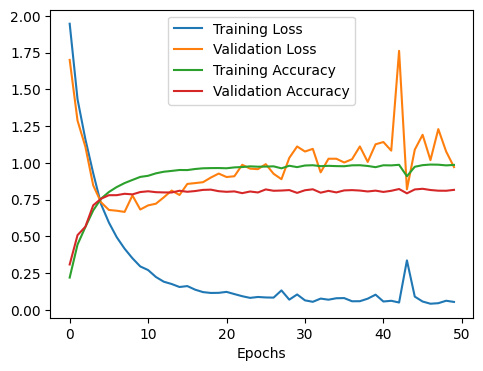

Model with learning rate 0.001 saved.
Validation accuracy: 0.816100001335144


In [17]:
# Define the learning rate
learning_rate = 0.001

# Load a pre-trained VGG16 model (excluding the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a custom top classification layer for CIFAR-10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_vgg_2 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_vgg_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
his_vgg_2 = model_vgg_2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

# Evaluate the model on the validation set
_, accuracy = model_vgg_2.evaluate(x_val, y_val)
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(his_vgg_2.history['loss'], label='Training Loss')
plt.plot(his_vgg_2.history['val_loss'], label='Validation Loss')
plt.plot(his_vgg_2.history['accuracy'], label='Training Accuracy')
plt.plot(his_vgg_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
# Save the model
model_vgg_2.save(f'cifar10_vgg16_lr{learning_rate}.h5')
print(f'Model with learning rate {learning_rate} saved.')
print(f'Validation accuracy: {accuracy}')

MOBILENETV2

9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/50
313/313 [==============================] - 34s 36ms/step - loss: 1.7103 - accuracy: 0.4047 - val_loss: 2.3391 - val_accuracy: 0.1466
Epoch 2/50
313/313 [==============================] - 10s 31ms/step - loss: 1.1950 - accuracy: 0.5787 - val_loss: 2.5410 - val_accuracy: 0.2128
Epoch 3/50
313/313 [==============================] - 10s 31ms/step - loss: 1.0089 - accuracy: 0.6464 - val_loss: 2.0124 - val_accuracy: 0.3170
Epoch 4/50
313/313 [==============================] - 10s 31ms/step - loss: 0.8604 - accuracy: 0.6966 - val_loss: 1.8302 - val_accuracy: 0.3246
Epoch 5/50
313/313 [==============================] - 10s 31ms/step - loss: 0.7561 - accuracy: 0.7320 - val_loss: 1.7715 - val_accuracy: 0.3285
Epoch 6/50
313/313 [==============================] - 10s 31ms/step - loss: 0.6585 - accuracy: 0.7673 - val_loss: 1.7254 - val_accuracy: 0.3537
Epoch 7/50
313/313 [==============================] - 10s 31ms/step - los

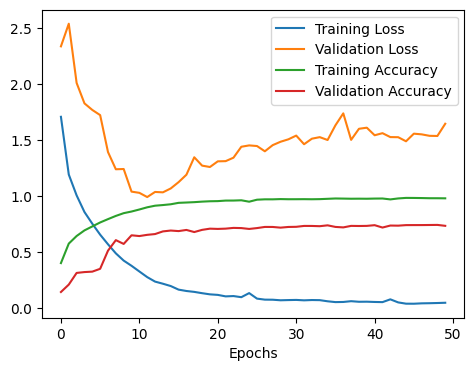

313/313 [==============================] - 2s 7ms/step - loss: 1.6483 - accuracy: 0.7373
Model with learning rate 0.0001 saved.
Validation accuracy: 0.7372999787330627


In [18]:

# Define the learning rate
learning_rate = 0.0001

# Load a pre-trained MobileNetV2 model (excluding the top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a custom top classification layer for CIFAR-10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_dense_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_dense_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
his_dense_1 = model_dense_1.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(his_dense_1.history['loss'], label='Training Loss')
plt.plot(his_dense_1.history['val_loss'], label='Validation Loss')
plt.plot(his_dense_1.history['accuracy'], label='Training Accuracy')
plt.plot(his_dense_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
# Evaluate the model on the validation set
_, accuracy = model_dense_1.evaluate(x_val, y_val)

# Save the model
model_dense_1.save(f'cifar10_mobilenetv2_lr{learning_rate}.h5')
print(f'Model with learning rate {learning_rate} saved.')
print(f'Validation accuracy: {accuracy}')

Epoch 1/50
313/313 [==============================] - 31s 35ms/step - loss: 1.2856 - accuracy: 0.5655 - val_loss: 5.6447 - val_accuracy: 0.1340
Epoch 2/50
313/313 [==============================] - 10s 31ms/step - loss: 0.8020 - accuracy: 0.7279 - val_loss: 3.0656 - val_accuracy: 0.4105
Epoch 3/50
313/313 [==============================] - 10s 31ms/step - loss: 0.6391 - accuracy: 0.7835 - val_loss: 1.6078 - val_accuracy: 0.5322
Epoch 4/50
313/313 [==============================] - 10s 31ms/step - loss: 0.5528 - accuracy: 0.8123 - val_loss: 2.0366 - val_accuracy: 0.4567
Epoch 5/50
313/313 [==============================] - 10s 31ms/step - loss: 0.4822 - accuracy: 0.8353 - val_loss: 1.8547 - val_accuracy: 0.5374
Epoch 6/50
313/313 [==============================] - 10s 31ms/step - loss: 0.4364 - accuracy: 0.8516 - val_loss: 2.2031 - val_accuracy: 0.5322
Epoch 7/50
313/313 [==============================] - 10s 30ms/step - loss: 0.3934 - accuracy: 0.8662 - val_loss: 1.2569 - val_accuracy:

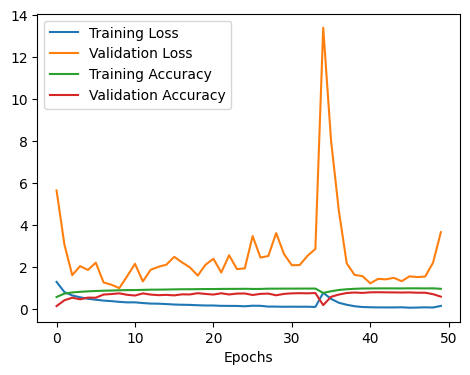

313/313 [==============================] - 2s 6ms/step - loss: 3.6537 - accuracy: 0.5831
Model with learning rate 0.001 saved.
Validation accuracy: 0.5831000208854675


In [19]:

# Define the learning rate
learning_rate = 0.001

# Load a pre-trained MobileNetV2 model (excluding the top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a custom top classification layer for CIFAR-10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_dense_2 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_dense_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
his_dense_2 =model_dense_2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(his_dense_2.history['loss'], label='Training Loss')
plt.plot(his_dense_2.history['val_loss'], label='Validation Loss')
plt.plot(his_dense_2.history['accuracy'], label='Training Accuracy')
plt.plot(his_dense_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
# Evaluate the model on the validation set
_, accuracy = model_dense_2.evaluate(x_val, y_val)

# Save the model
model_dense_2.save(f'cifar10_mobilenetv2_lr{learning_rate}.h5')
print(f'Model with learning rate {learning_rate} saved.')
print(f'Validation accuracy: {accuracy}')

BASE LINE

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 10, 10, 128)       147584    
                                                      

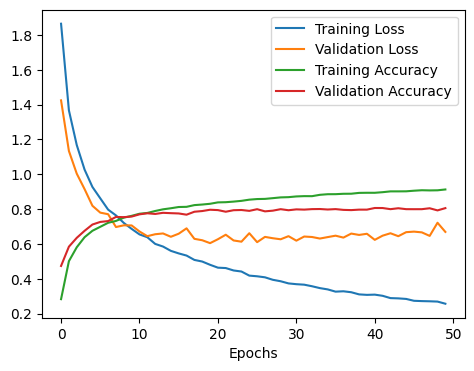

313/313 [==============================] - 1s 3ms/step - loss: 0.6796 - accuracy: 0.8009


[0.6796005964279175, 0.8008999824523926]

In [31]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))  # Add dropout after the max-pooling layer

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

history2 = model2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

model2.evaluate(x_test, y_test)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 conv2d_33 (Conv2D)          (None, 10, 10, 128)       147584    
                                                      

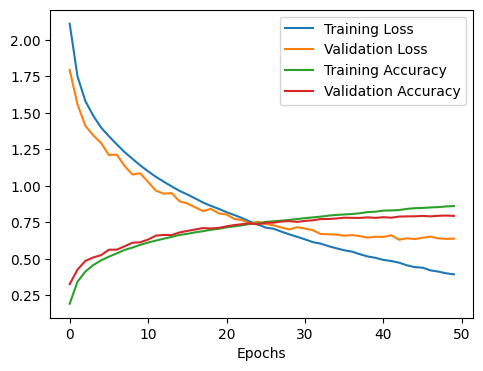

313/313 [==============================] - 1s 3ms/step - loss: 0.6628 - accuracy: 0.7859


[0.6628305912017822, 0.7858999967575073]

In [32]:
# Create a more complex Sequential model named "model3" with dropout layers
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))  # Add dropout after the max-pooling layer

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

history2 = model2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

model2.evaluate(x_test, y_test)

PREDICT ON TEST SET

In [23]:

model = keras.models.load_model('/content/resnet50_lr0.0001.h5')
# Use the model to make predictions
loss, accuray = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 9ms/step - loss: 1.1861 - accuracy: 0.8005


In [25]:

model = keras.models.load_model('/content/cifar10_resnet50_lr0.001.h5')
# Use the model to make predictions
loss, accuray = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 9ms/step - loss: 1.6708 - accuracy: 0.7102


In [28]:

model = keras.models.load_model('/content/cifar10_vgg16_lr0.0001.h5')
# Use the model to make predictions
loss, accuray = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8107 - accuracy: 0.8427


In [29]:

model = keras.models.load_model('/content/cifar10_mobilenetv2_lr0.0001.h5')
# Use the model to make predictions
loss, accuray = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 1.6085 - accuracy: 0.7382


In [30]:

model = keras.models.load_model('/content/cifar10_mobilenetv2_lr0.001.h5')
# Use the model to make predictions
loss, accuray = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 3.5174 - accuracy: 0.5790
